In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

fuel_econ = pd.read_csv('./fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


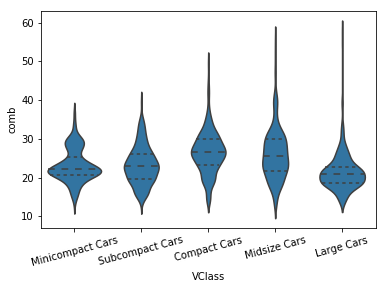

In [2]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile');
plt.xticks(rotation=15);

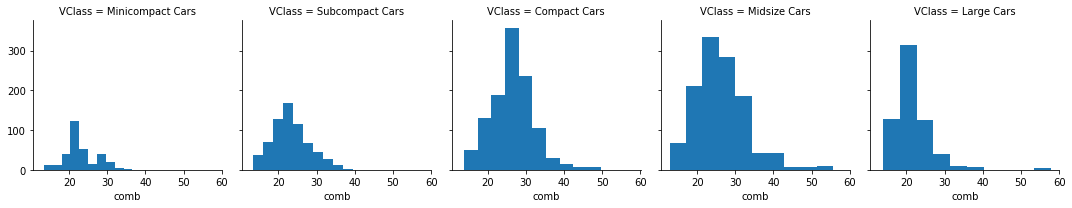

In [5]:
g = sb.FacetGrid(data=fuel_econ, col='VClass');
g.map(plt.hist, 'comb');

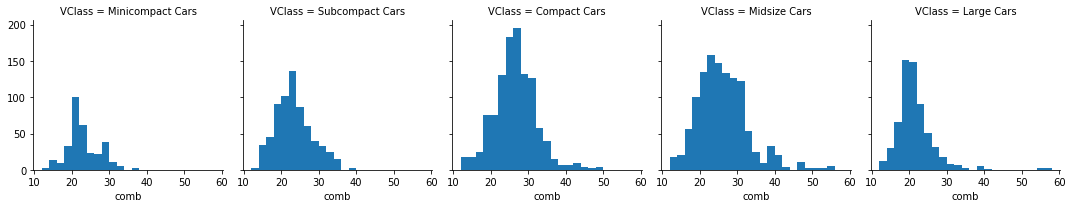

In [7]:
bins =  np.arange(12, 58 + 2, 2)
g = sb.FacetGrid(data=fuel_econ, col='VClass');
g.map(plt.hist, 'comb', bins=bins);

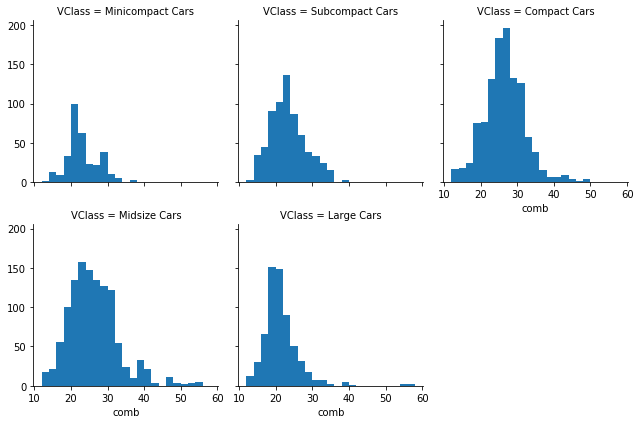

In [8]:
bins =  np.arange(12, 58 + 2, 2)
g = sb.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3);
g.map(plt.hist, 'comb', bins=bins);

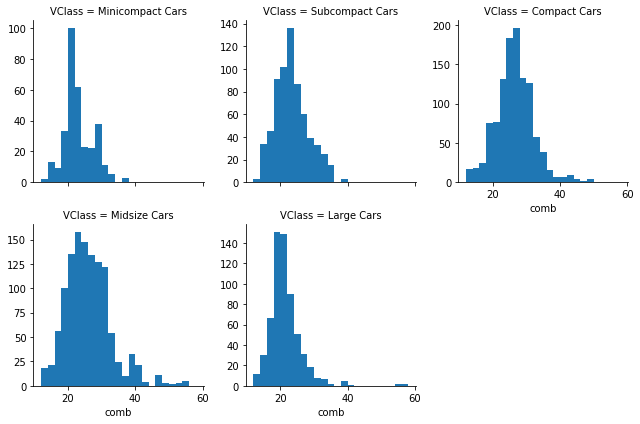

In [9]:
bins =  np.arange(12, 58 + 2, 2)
g = sb.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3, sharey=False);
g.map(plt.hist, 'comb', bins=bins);

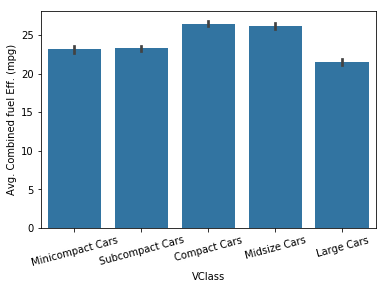

In [13]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylabel("Avg. Combined fuel Eff. (mpg)");

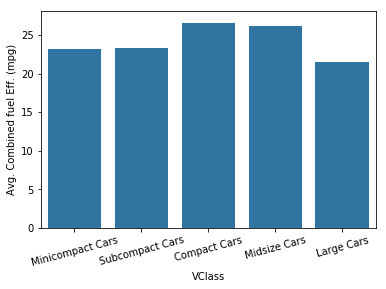

In [14]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)
plt.xticks(rotation=15);
plt.ylabel("Avg. Combined fuel Eff. (mpg)");

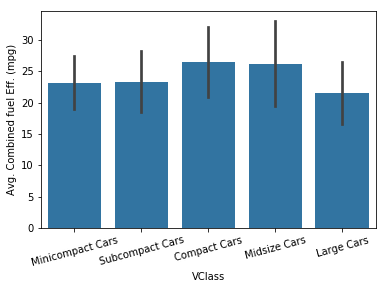

In [15]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=15);
plt.ylabel("Avg. Combined fuel Eff. (mpg)");

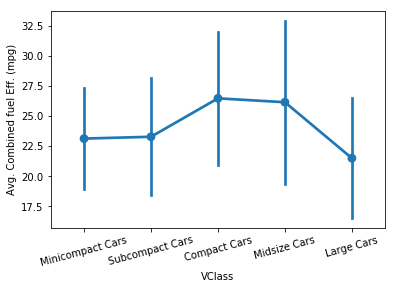

In [16]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=15);
plt.ylabel("Avg. Combined fuel Eff. (mpg)");

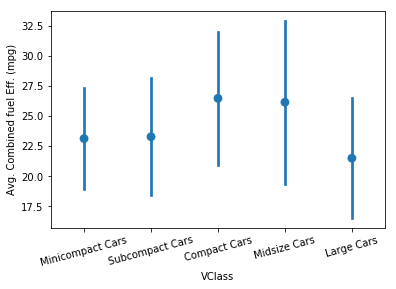

In [18]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd',linestyles="")
plt.xticks(rotation=15);
plt.ylabel("Avg. Combined fuel Eff. (mpg)");

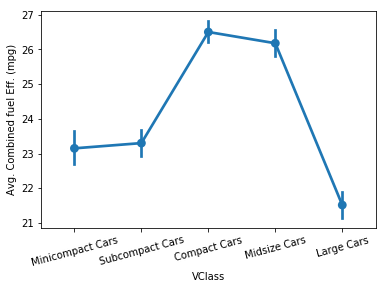

In [19]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb')
plt.xticks(rotation=15);
plt.ylabel("Avg. Combined fuel Eff. (mpg)");

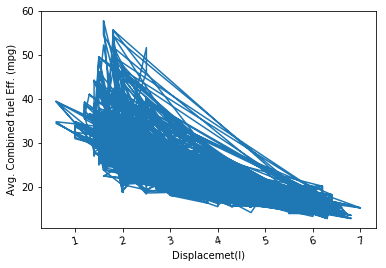

In [21]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel("Avg. Combined fuel Eff. (mpg)");
plt.xlabel("Displacemet(l)");

In [31]:
bins_e = np.arange(0.6, 7 + 0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest= True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_sd = fuel_econ['comb'].groupby(displ_binned).std()

[ 0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5  2.7  2.9  3.1  3.3  3.5
  3.7  3.9  4.1  4.3  4.5  4.7  4.9  5.1  5.3  5.5  5.7  5.9  6.1  6.3  6.5
  6.7  6.9]


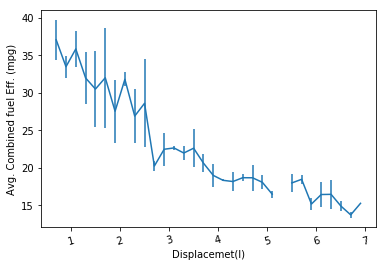

In [28]:
plt.errorbar(x=bins_c, y=comb_mean, yerr=comb_sd)
plt.xticks(rotation=15);
plt.ylabel("Avg. Combined fuel Eff. (mpg)");
plt.xlabel("Displacemet(l)");